In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [3]:
samples = gen_quant.sample(data={'M':5}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [4]:
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5]
0,0.0,0.0,120.54400,116.0,119.0,110.0,139.0,124.0
1,0.0,0.0,42.26070,38.0,32.0,46.0,43.0,49.0
2,0.0,0.0,52.41930,51.0,42.0,47.0,41.0,62.0
3,0.0,0.0,125.53400,124.0,122.0,131.0,115.0,145.0
4,0.0,0.0,340.20100,346.0,345.0,345.0,338.0,370.0
...,...,...,...,...,...,...,...,...
995,0.0,0.0,4.58464,4.0,6.0,3.0,4.0,2.0
996,0.0,0.0,112.79900,117.0,112.0,127.0,110.0,126.0
997,0.0,0.0,46.36690,34.0,42.0,37.0,42.0,37.0
998,0.0,0.0,125.88800,134.0,135.0,147.0,143.0,135.0


(array([60., 65., 68., 51., 62., 54., 43., 41., 41., 41., 37., 38., 46.,
        33., 41., 36., 34., 23., 26., 19., 15., 13., 16., 11., 18.,  6.,
        10.,  4., 12.,  9.,  0.,  5.,  9.,  1.,  0.,  2.,  0.,  0.,  0.,
         1.,  1.,  4.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  0.  ,   8.88,  17.76,  26.64,  35.52,  44.4 ,  53.28,  62.16,
         71.04,  79.92,  88.8 ,  97.68, 106.56, 115.44, 124.32, 133.2 ,
        142.08, 150.96, 159.84, 168.72, 177.6 , 186.48, 195.36, 204.24,
        213.12, 222.  , 230.88, 239.76, 248.64, 257.52, 266.4 , 275.28,
        284.16, 293.04, 301.92, 310.8 , 319.68, 328.56, 337.44, 346.32,
        355.2 , 364.08, 372.96, 381.84, 390.72, 399.6 , 408.48, 417.36,
        426.24, 435.12, 444.  ]),
 <BarContainer object of 50 artists>)

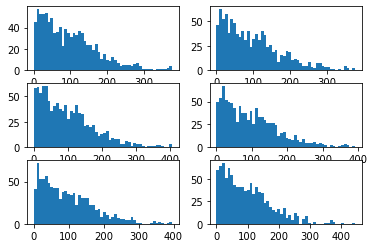

In [9]:
nobins = 50;
f,ax = plt.subplots(3,2)
ax[0,0].hist(df['lambda'], bins = nobins)
ax[0,1].hist(df['y_sim[1]'], bins = nobins)
ax[1,0].hist(df['y_sim[2]'], bins = nobins)
ax[1,1].hist(df['y_sim[3]'], bins = nobins)
ax[2,0].hist(df['y_sim[4]'], bins = nobins)
ax[2,1].hist(df['y_sim[5]'], bins = nobins)
